## Explanation:

Data Exploration: Check the structure, summary, and missing values in the dataset.

Trend Analysis: Visualize the distribution of content categories and correlation between subscribers, likes, and comments.

Audience Study: Visualize the distribution of audiences by country and regional preferences for content categories.

Performance Metrics: Calculate and visualize average performance metrics.

Content Categories: Explore the distribution of content categories and their performance metrics.

Brands and Collaborations: Analyze the relationship between subscribers and brand collaborations.

Benchmarking: Identify and visualize top-performing streamers.
Content Recommendations: Build a basic content recommendation system using user-content interaction data.

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None
              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.

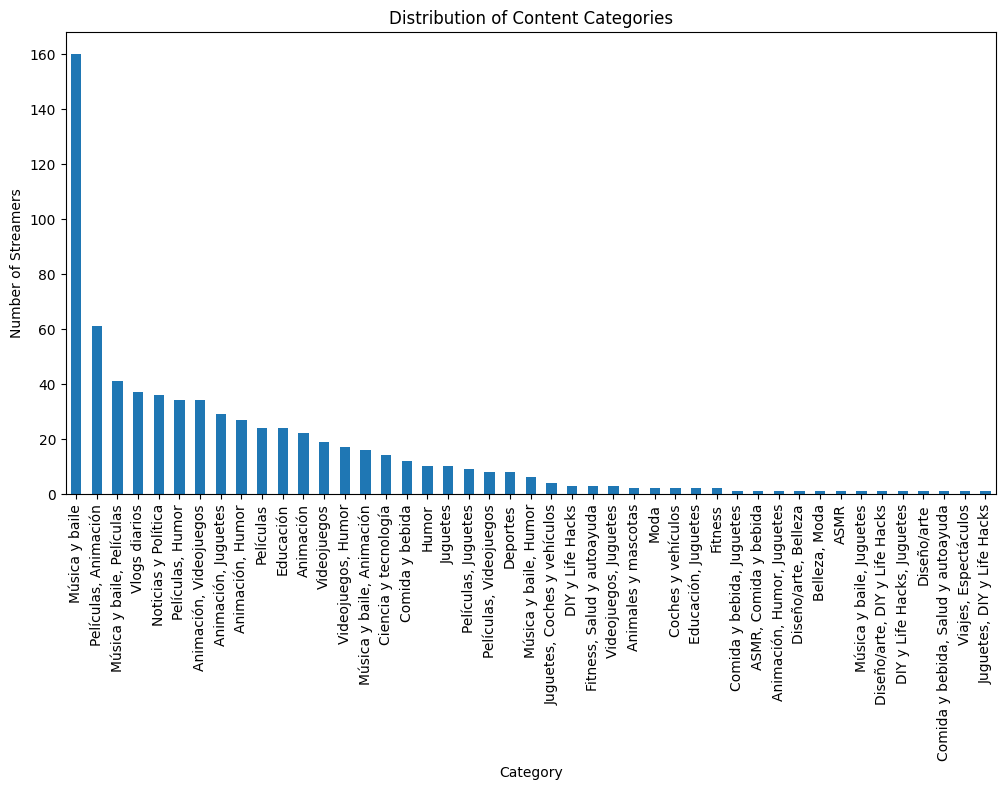

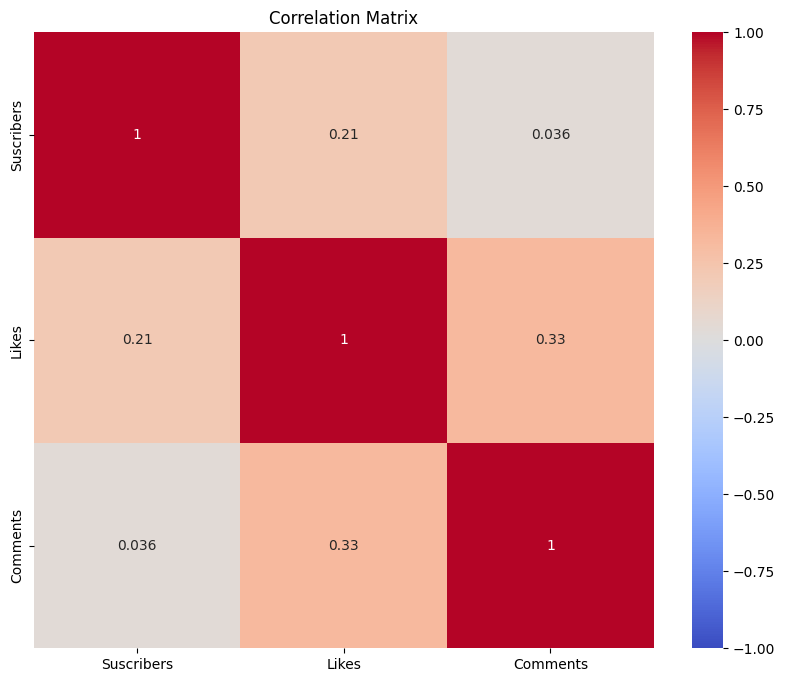

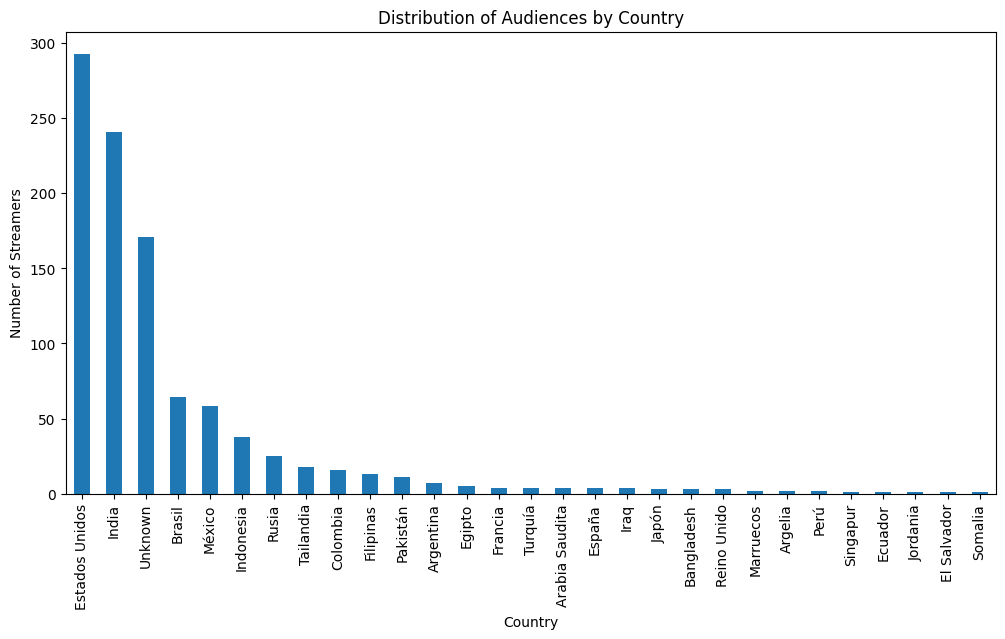

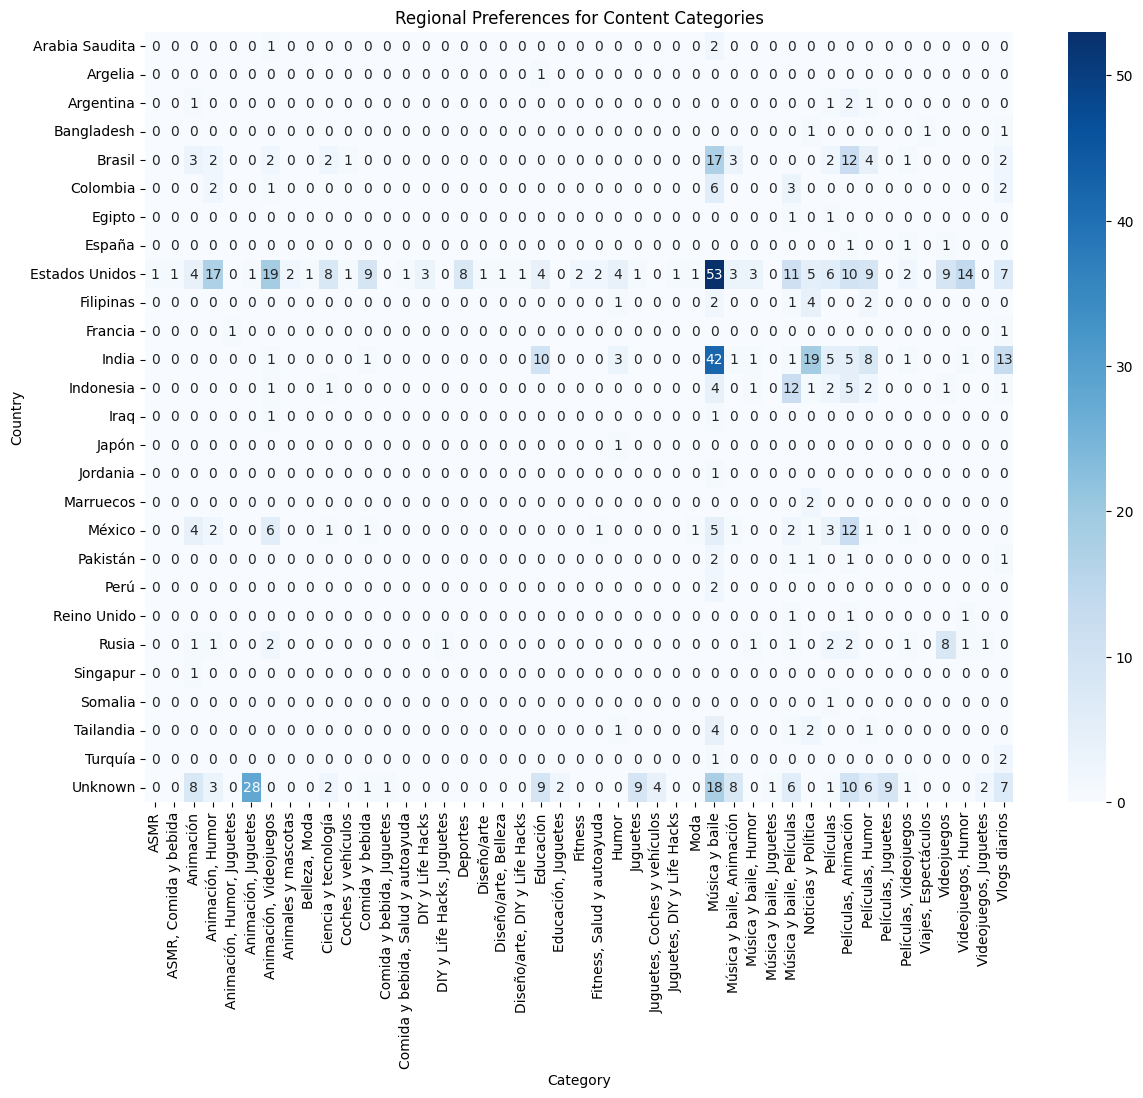

Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64


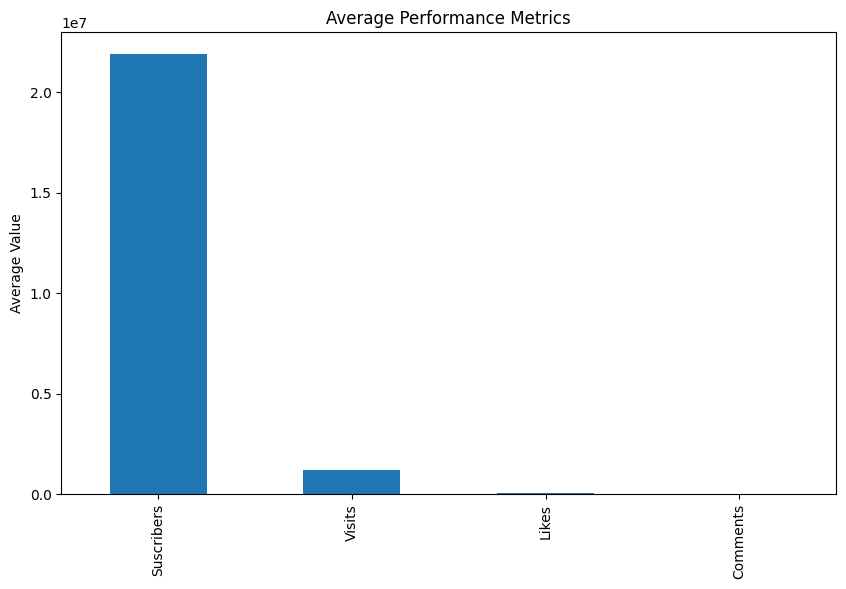

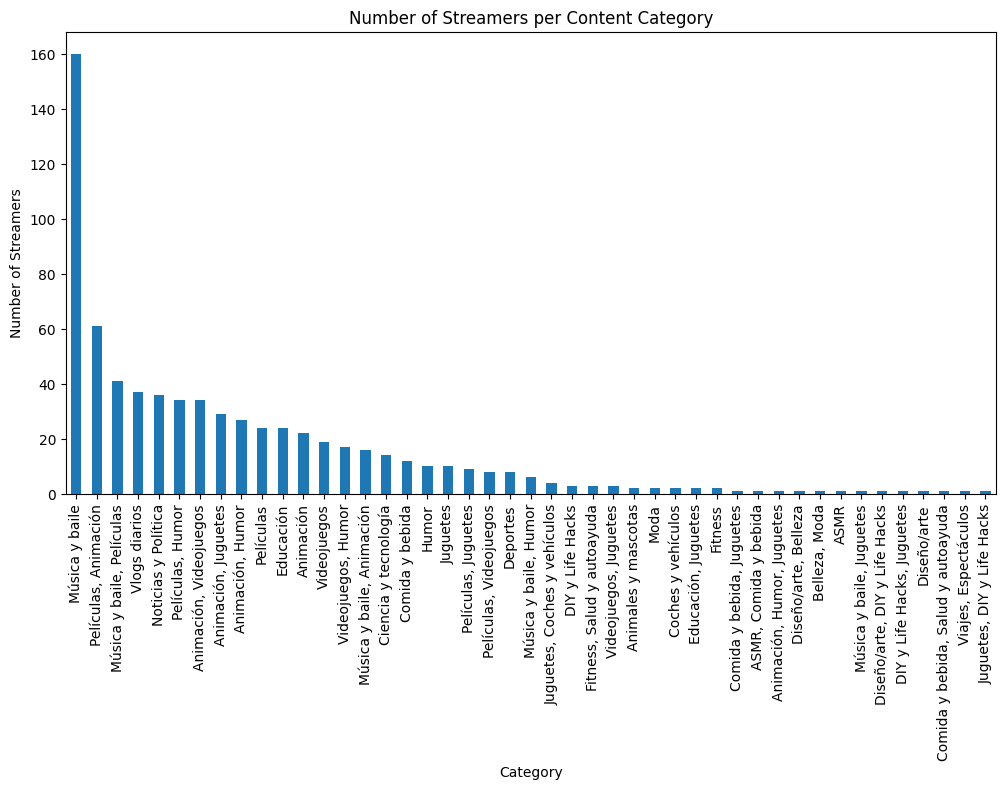

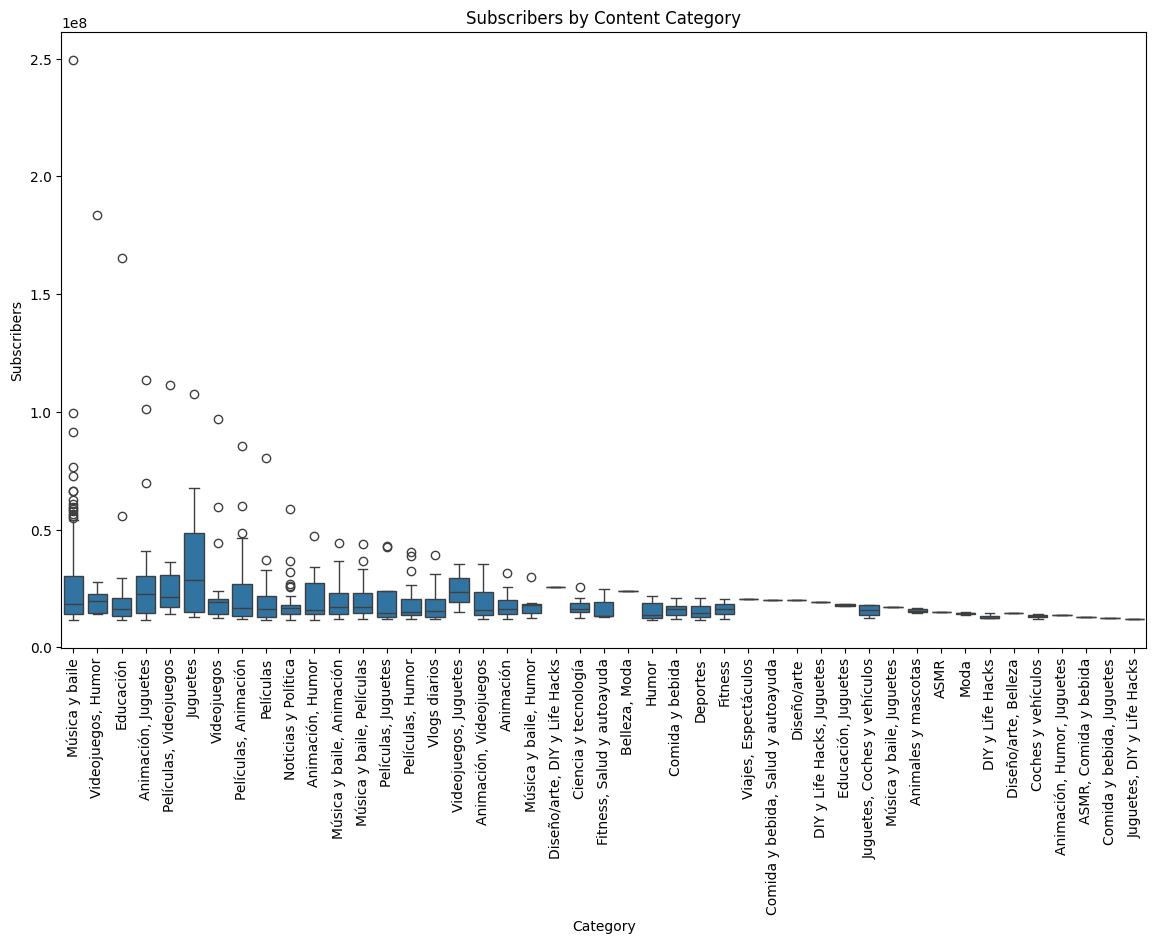

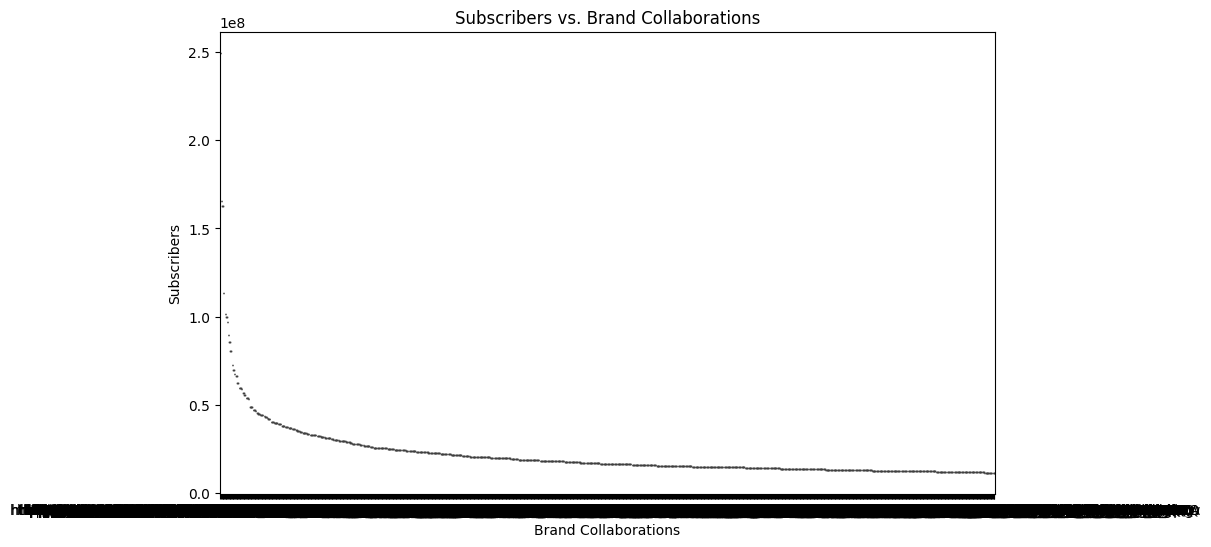

     Rank               Username              Categories   Suscribers  \
1       2                MrBeast      Videojuegos, Humor  183500000.0   
2       3              CoComelon               Educación  165500000.0   
4       5          KidsDianaShow     Animación, Juguetes  113500000.0   
5       6              PewDiePie  Películas, Videojuegos  111500000.0   
6       7     LikeNastyaofficial                Juguetes  107500000.0   
..    ...                    ...                     ...          ...   
288   289  VillageCookingChannel                     NaN   22500000.0   
293   294            BeatboxJCOP                     NaN   22300000.0   
295   296            rotanamusic          Música y baile   22300000.0   
300   301           alfredolarin                     NaN   21900000.0   
302   303             royaltyfam                   Humor   21900000.0   

            Country       Visits      Likes  Comments  \
1    Estados Unidos  117400000.0  5300000.0   18500.0   
2        

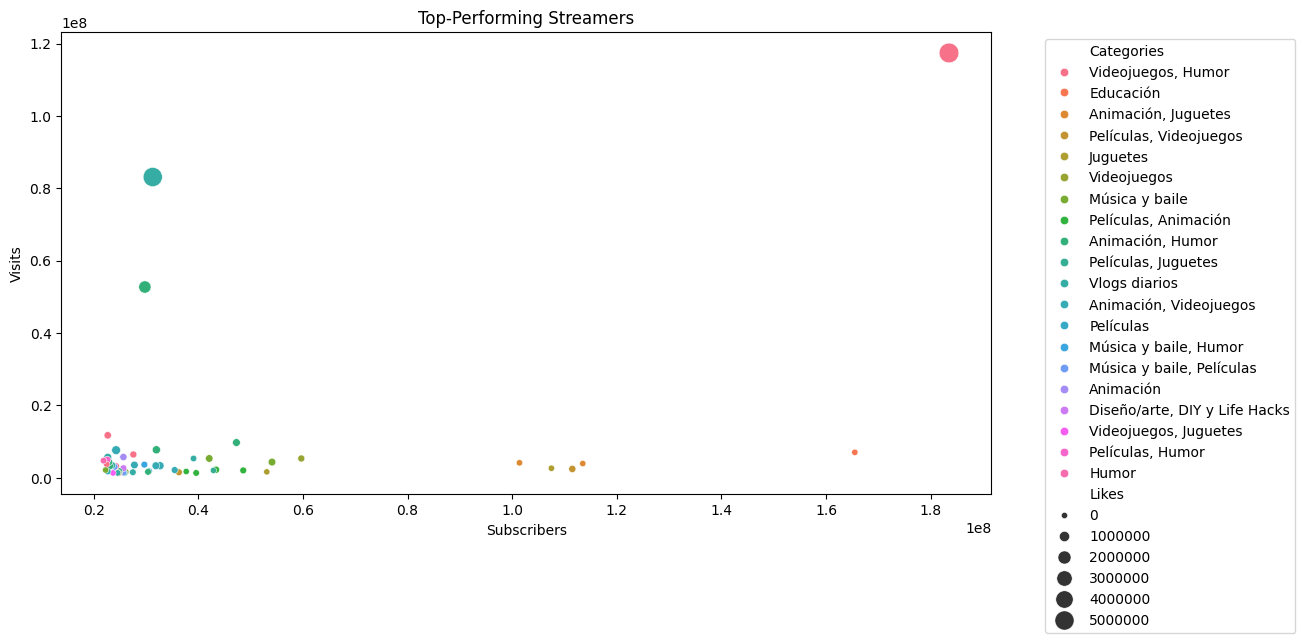

user_id         1         2         3
user_id                              
1        1.000000  0.766965  0.401754
2        0.766965  1.000000  0.279372
3        0.401754  0.279372  1.000000
Recommended content for user 1: {103}


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
df = pd.read_csv('youtubers_df.csv')

# Verify the correct column names
print(df.columns)

# Data Exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Trend Analysis
# Distribution of content categories
plt.figure(figsize=(12, 6))
category_counts = df['Categories'].value_counts()
category_counts.plot(kind='bar')
plt.title('Distribution of Content Categories')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Audience Study
# Audience distribution by country
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts()
country_counts.plot(kind='bar')
plt.title('Distribution of Audiences by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.show()

# Regional preferences for specific content categories
pivot_table = df.pivot_table(index='Country', columns='Categories', values='Suscribers', aggfunc='count', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Category')
plt.ylabel('Country')
plt.show()

# Performance Metrics
# Average performance metrics
avg_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
print(avg_metrics)

# Visualize average metrics
plt.figure(figsize=(10, 6))
avg_metrics.plot(kind='bar')
plt.title('Average Performance Metrics')
plt.ylabel('Average Value')
plt.show()

# Content Categories
# Distribution of content categories
plt.figure(figsize=(12, 6))
df['Categories'].value_counts().plot(kind='bar')
plt.title('Number of Streamers per Content Category')
plt.xlabel('Category')
plt.ylabel('Number of Streamers')
plt.show()

# Performance metrics by category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Categories', y='Suscribers', data=df)
plt.title('Subscribers by Content Category')
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.xticks(rotation=90)
plt.show()

# Brands and Collaborations
# Assuming 'Links' column indicates brand collaborations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Links', y='Suscribers', data=df)
plt.title('Subscribers vs. Brand Collaborations')
plt.xlabel('Brand Collaborations')
plt.ylabel('Subscribers')
plt.show()

# Benchmarking
# Define above-average performance threshold
threshold_subscribers = df['Suscribers'].mean()
threshold_visits = df['Visits'].mean()

# Identify top performers
top_performers = df[(df['Suscribers'] > threshold_subscribers) & (df['Visits'] > threshold_visits)]
print(top_performers)

# Visualize top performers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Suscribers', y='Visits', data=top_performers, hue='Categories', size='Likes', sizes=(20, 200))
plt.title('Top-Performing Streamers')
plt.xlabel('Subscribers')
plt.ylabel('Visits')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Content Recommendations
# Create a user-content interaction matrix (example)
# For simplicity, we create a dummy matrix
dummy_data = {
    'user_id': [1, 1, 2, 2, 3, 3],
    'content_id': [101, 102, 101, 103, 102, 103],
    'interaction': [5, 3, 4, 2, 5, 4]
}
interaction_df = pd.DataFrame(dummy_data)

# Create user-item matrix
user_item_matrix = interaction_df.pivot(index='user_id', columns='content_id', values='interaction').fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

print(user_similarity_df)

# Recommend content for a specific user (e.g., user_id = 1)
user_id = 1
similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]  # Exclude the user itself
recommended_content = set()

for similar_user in similar_users:
    recommended_content.update(user_item_matrix.loc[similar_user].index[user_item_matrix.loc[similar_user] > 0])

# Exclude content the user has already interacted with
already_interacted = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index)
final_recommendations = recommended_content - already_interacted

print(f"Recommended content for user {user_id}: {final_recommendations}")
